# 线性回归中的梯度下降与一维搜索

之前讲到了一般线性回归和岭回归的矩阵求解方式，但是并非所有的模型都能方便地求出数学最优解，往往需要采取逐步迭代的方式寻找近似最优解。常见的方法有梯度下降法、牛顿迭代法、拟牛顿法等。为了便于直观地展现求解过程，本文中将以求二次函数的最小值为例，讲解梯度下降法的使用方法。

## 梯度下降

假设有函数$y = 2x^2+ 3x +4$，绘制出的函数图像如下：

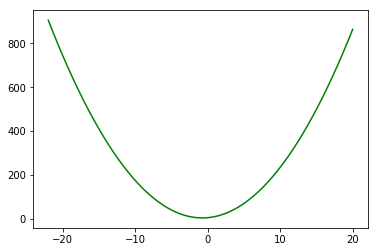

In [1]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
x = np.linspace(-22,20,100)
def func(x):
    y = 2*x**2 + 3*x + 4
    return y
y = func(x)
plt.plot(x,y,color = 'g')

可以很容易的得到y的导数方程：

In [2]:
def gradient(x):
    return 4*x + 3

给定任意初始值x_0，设置步长为0.2，根据梯度下降原理，对最优解进行搜索

1.4000000000000004
-0.32000000000000006
-0.664
-0.7328
-0.74656
-0.749312
-0.7498624
-0.74997248
-0.749994496
-0.7499988992


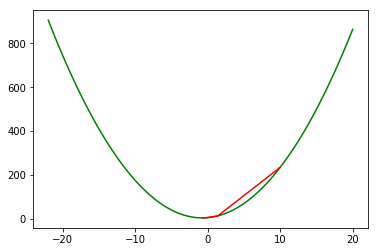

In [5]:
def minimize(x0 = 10,step = 0.2):
    x = x0
    path = []
    path.append(x)
    #先迭代五次
    for i in range(10):
        x = x - step*gradient(x)
        print(x)
        path.append(x)
    return path
path = minimize()
plt.plot(x,y,color = 'g')
plt.plot(path,[func(x) for x in path],color = 'r')

如果换一个x0效果会如何呢？

3.3999999999999986
0.07999999999999963
-0.5840000000000001
-0.7168
-0.74336
-0.748672
-0.7497344
-0.74994688
-0.749989376
-0.7499978752


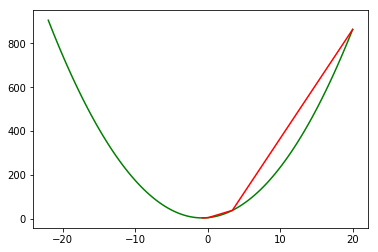

In [6]:
path = minimize(20)
plt.plot(x,y,color = 'g')
plt.plot(path,[func(x) for x in path],color = 'r')

其实对于这种单峰函数来说，初始值对最后结果的影响并不大，只是会影响迭代的次数而已。

我们再换增大一点步长试试：

-15.8
20.319999999999997
-30.247999999999994
40.54719999999999
-58.566079999999985
80.19251199999998
-114.06951679999996
157.89732351999993
-222.8562529279999
310.19875409919985


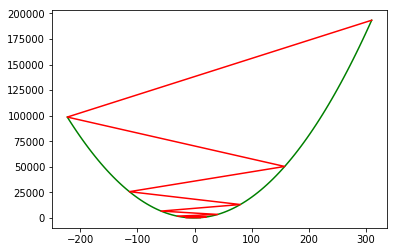

In [8]:
path = minimize(10,0.6)
x = np.linspace(min(path),max(path),100)
plt.plot(x,[func(a) for a in x],color = 'g')
plt.plot(path,[func(b) for b in path],color = 'r')

从图中可以看到，在步长设置不合理情况下，x有可能会逐渐偏离函数最小值，最终得到的函数值的绝对值越来越大，很快便会超出实数范围，得到inf。

为了解决这个问题，需要动态调整步长。

比较简单的思路是这样的：在每一步迭代之前检查一下y值是不是在增大，如果y值增大了，就缩小step的值：

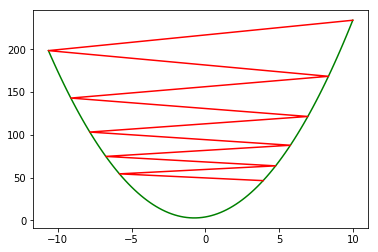

In [9]:
def minimize(x0 = 10,step = 0.2,beta = 0.8):
    x = x0
    path = []
    path.append(x)
    #先迭代五次
    for i in range(10):
        new_x = x - step*gradient(x)
        while func(x) < func(new_x):
            step *= beta
            new_x = x-step*gradient(x)
        x = new_x
        path.append(x)
    return path
path = minimize(10,0.6)
m = np.linspace(min(path),max(path),100)
plt.plot(m,[func(a) for a in m],color = 'g')
plt.plot(path,[func(b) for b in path],color = 'r')

小小的改动之后就可以避免函数增大，如果希望收敛速度更快一些的话，就需要调节beta，调节beta的难度比调节step简单得多。

如果想加快收敛速度的话，可以改用更加严谨的一维搜索方法。

## 一维搜索

在同样的beta条件下，一维搜索能够更快地收敛，并且能step变得太小。

一维搜索有很多种实现方式，上面用的这种算是效率较高的一维搜索算法，名为：回溯线搜索 backtracking line search。

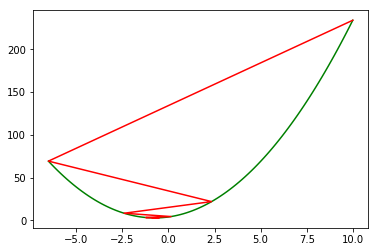

In [10]:
def line_search(x,gradient,step,threshold = 0.1,beta = 0.8):
    while func(x-step*gradient) > func(x) - threshold * step * gradient**2:
        step *= beta
    return step

def line_minimize(x0 = 10,step = 0.2,beta = 0.8):
    x = x0
    path = []
    path.append(x)
    #先迭代五次
    for i in range(10):
        step = line_search(x,gradient(x),step)
        x = x - step * gradient(x)
        path.append(x)
    return path

path = line_minimize(10,0.6)
m = np.linspace(min(path),max(path),100)
plt.plot(m,[func(a) for a in m],color = 'g')
plt.plot(path,[func(b) for b in path],color = 'r')